# Data engineering

In [1]:
from pandas_profiling import ProfileReport

import missingno as msno
import pandas as pd
import numpy as np
import glob
import re

## Variables

In [2]:
RAW_DATA = './downloads/raw'
PPD_DATA = './downloads/pre-processed'

## Functions

Displays the profiling of the dataframe and saves it in a path

- df: dataframe to be analyzed
- title: title to be awarded in profiling
- f_out: path to the output file

In [3]:
def show_profiling(
    df: pd.DataFrame, title: str = None, f_out: str = None
) -> None:
    prof = ProfileReport(df, title=title)
    prof.to_widgets()
    if f_out:
        prof.to_file(output_file=f_out)

## Preprocessing

List xlsx files

In [199]:
files = glob.glob(f'{RAW_DATA}/*.xlsx')
files

['./downloads/raw/BOLETIM ENSAIOS PCR_01.07.2020_CORTE.xlsx',
 './downloads/raw/BOLETIM ENSAIOS PCR_CORTE 20_08_2020.xlsx']

clean and convert xlsx2csv

In [200]:
df = pd.DataFrame()

for f in files:
    aux = pd.read_excel(f)
    aux = aux.rename(columns={c:re.sub(u'\xa0|\s$', '', c) for c in aux.columns})
    aux = aux.replace(r'^\s*$', np.nan, regex=True)
    aux = aux[~aux.isnull().all(axis=1)]
    df = pd.concat([df,aux], ignore_index=True)

df.to_csv(f'{PPD_DATA}/all.csv', index=False)

Open file

In [4]:
parse_dates = [
    'Data de nascimento',
    'Data da internação hospitalar:',
    'Data da alta hospitalar:',
    'Data do isolamento:',
    'Data da viagem de ida para outro local transmissão:',
    'Data da viagem de volta do outro local transmissão:',
    'DATA DA COLETA'
]

In [5]:
df = pd.read_csv(f'{PPD_DATA}/all.csv', parse_dates=parse_dates)

Columns

In [6]:
[(i,c) for i,c in enumerate(df.columns)]

[(0, 'ID'),
 (1, 'Nome da Empresa'),
 (2, 'Nome do paciente (completo)'),
 (3, 'Data de nascimento'),
 (4, 'Idade em anos'),
 (5, 'Sexo'),
 (6, 'Raça'),
 (7, 'CEP'),
 (8, 'Rua'),
 (9, 'Número'),
 (10, 'Complemento ( Condomínio, edifício, apto)'),
 (11, 'Bairro'),
 (12, 'Município'),
 (13, 'Estado'),
 (14, 'Apresenta sintomas?'),
 (15, 'Data dos primeiros sintomas:'),
 (16, 'Selecione os sintomas apresentados:'),
 (17, 'Se outros sintomas apresentados, especificar:'),
 (18, 'Selecione os sinais clínicos observados:'),
 (19, 'Condições:Selecionar todas morbidades pertinentes.'),
 (20, 'Paciente foi hospitalizado?'),
 (21, 'Nome do hospital de internação:'),
 (22, 'Data da internação hospitalar:'),
 (23, 'Data da alta hospitalar:'),
 (24, 'Data do isolamento:'),
 (25, 'Paciente foi submetido a ventilação mecânica?'),
 (26, 'Situação de saúde do paciente no momento da notificação:*'),
 (27, 'Foi realizada coleta de amostra do paciente?'),
 (28,
  'Paciente tem histórico de viagem para fora

Missing values

<AxesSubplot:>

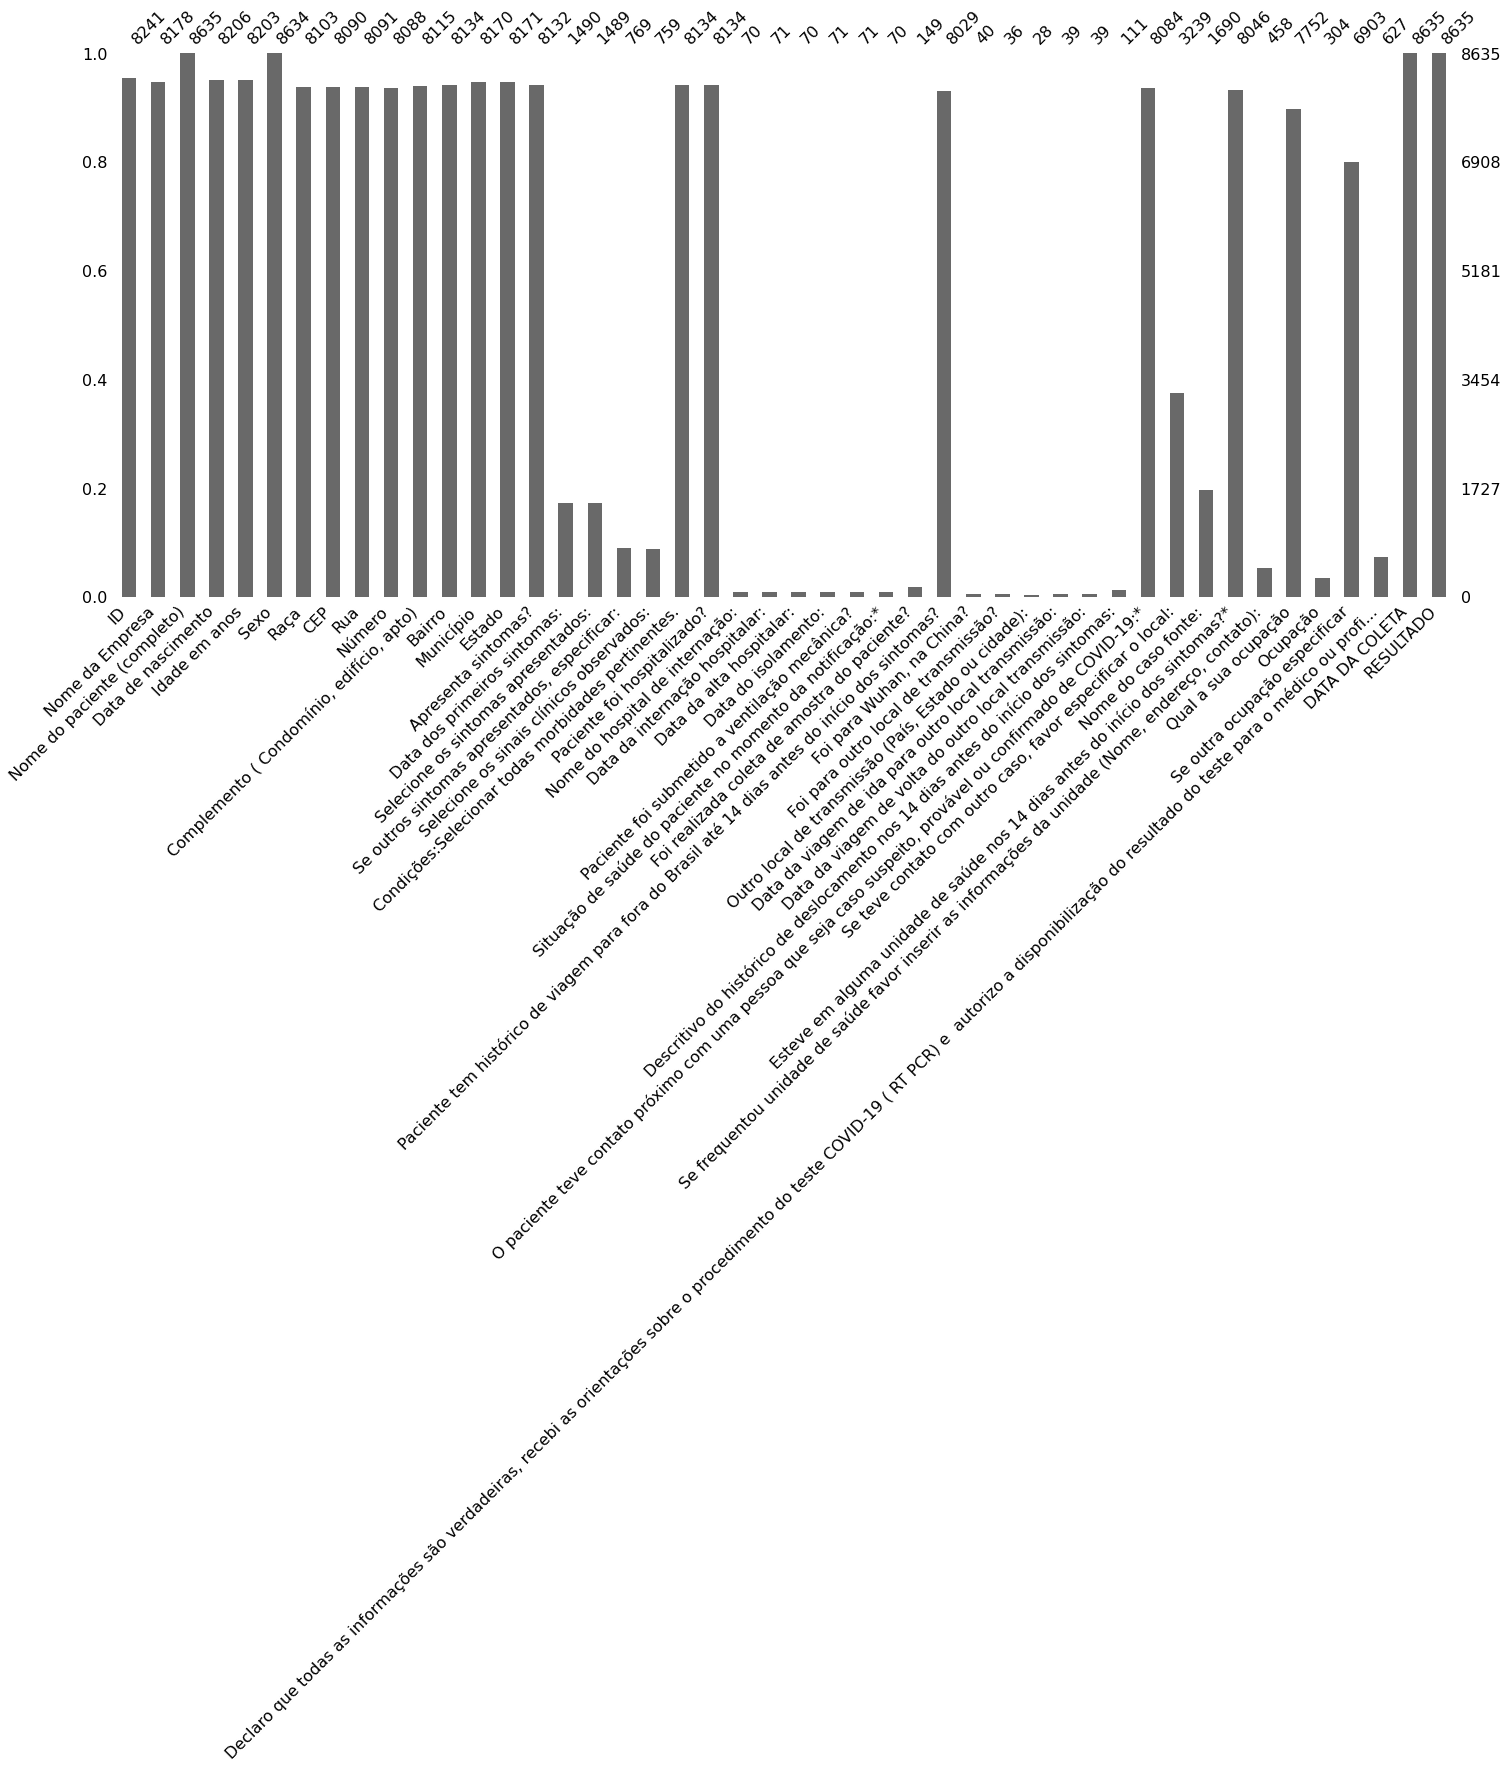

In [7]:
msno.bar(df)

Profiling

In [ ]:
show_profiling(df, 'PCR Analysis', f'{PPD_DATA}/all.csv.html')